# 4. Napovedovanje aktivnosti struktur na naboru naključnih molekul

In [1]:
%run __2024_02_18_01_libs.py

# Uvoz knjiznic
from __2024_02_18_01_libs import *

%matplotlib inline

2024-11-04 22:16:59.054472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/samonose/PycharmProjects/pythonProject4
/Users/samonose/PycharmProjects/pythonProject4


In [2]:
%run __2024_02_18_01_functions.py

from __2024_02_18_01_functions import *

# 4.1. Pridobitev naključnih struktur

In [3]:
import gzip
import pandas as pd
import os

# Directory containing the .gz files
directory = '/Users/samonose/mag_new/FTP_BASIC/2024-05/All Stock Compounds/SMILES'

# Initialize an empty list to store the data
data = []

# Read the training dataset
df_train = pd.read_csv('__2024_02_25/2024_05_28/__2024_02_18_DP_dataset.csv')

# Extract SMILES strings from the training dataset
trained_smiles = set(df_train['Smiles'])

# Iterate over each .gz file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.gz'):
        filepath = os.path.join(directory, filename)
        with gzip.open(filepath, 'rt') as f:
            # Read the file, skipping the first line (header)
            next(f)  # Skip the header
            for line in f:
                # Split the line into fields and append to the data list
                data.append(line.strip().split('\t'))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['SMILES', 'SMILES_CANONICAL', 'MOLPORTID'])

# Filter out rows that are in the training dataset
df_filtered = df[~df['SMILES_CANONICAL'].isin(trained_smiles)]

# Save the filtered DataFrame to a CSV file
output_path = os.path.join(directory, 'combined_smiles_filtered.csv')
df_filtered.to_csv(output_path, index=False)

# Calculate the count of matches excluded
matches_count = len(df) - len(df_filtered)
print(f'Number of matches excluded: {matches_count}')

# Optionally, display the first few rows of the filtered DataFrame
df_filtered

Number of matches excluded: 100


,SMILES,SMILES_CANONICAL,MOLPORTID
0,O=C1N(CC2=CC=C(S2)S(=O)(=O)N2CCCC3=C2C=CC=C3)C...,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,Molport-007-763-075
1,CC1=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C3=...,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,Molport-007-763-076
2,COC1=CC(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C...,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-077
3,CC1=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C3=...,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,Molport-007-763-078
4,CC1=CC=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4...,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-079
...,...,...,...
5319256,ClC1=CC=C(C=C1)N1C(=O)C2=C(N=C1C1=CC=CS1)N(N=C...,Clc1ccc(cc1)-n1c(nc2n(ncc2c1=O)-c1ccccc1)-c1cccs1,Molport-002-191-019
5319257,CC1=CC(Cl)=CC(Cl)=C1OCC(=O)NC1=CC(C2=NC3=CC=CC...,Cc1cc(Cl)cc(Cl)c1OCC(=O)Nc1ccc(O)c(c1)-c1nc2cc...,Molport-002-191-020
5319258,CCOC(=O)C1=C(NC2=CC=C(C=C2)[N+]([O-])=O)S\C(=C...,CCOC(=O)C1=C(Nc2ccc(cc2)[N+]([O-])=O)S\C(=C/c2...,Molport-002-191-021
5319259,COC1=CC=C(C=C1)N1N=C2C=CC(NC(=O)CC3=CC=C(Cl)C=...,COc1ccc(cc1)-n1nc2ccc(NC(=O)Cc3ccc(Cl)cc3)cc2n1,Molport-002-191-022


In [4]:
df_filtered_1 = df_filtered.copy()
df_filtered_1.rename(columns={'SMILES_CANONICAL': 'Smiles'}, inplace=True)
df_filtered_1

,SMILES,Smiles,MOLPORTID
0,O=C1N(CC2=CC=C(S2)S(=O)(=O)N2CCCC3=C2C=CC=C3)C...,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,Molport-007-763-075
1,CC1=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C3=...,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,Molport-007-763-076
2,COC1=CC(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C...,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-077
3,CC1=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C3=...,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,Molport-007-763-078
4,CC1=CC=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4...,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-079
...,...,...,...
5319256,ClC1=CC=C(C=C1)N1C(=O)C2=C(N=C1C1=CC=CS1)N(N=C...,Clc1ccc(cc1)-n1c(nc2n(ncc2c1=O)-c1ccccc1)-c1cccs1,Molport-002-191-019
5319257,CC1=CC(Cl)=CC(Cl)=C1OCC(=O)NC1=CC(C2=NC3=CC=CC...,Cc1cc(Cl)cc(Cl)c1OCC(=O)Nc1ccc(O)c(c1)-c1nc2cc...,Molport-002-191-020
5319258,CCOC(=O)C1=C(NC2=CC=C(C=C2)[N+]([O-])=O)S\C(=C...,CCOC(=O)C1=C(Nc2ccc(cc2)[N+]([O-])=O)S\C(=C/c2...,Molport-002-191-021
5319259,COC1=CC=C(C=C1)N1N=C2C=CC(NC(=O)CC3=CC=C(Cl)C=...,COc1ccc(cc1)-n1nc2ccc(NC(=O)Cc3ccc(Cl)cc3)cc2n1,Molport-002-191-022


In [5]:
df_filtered_1 = df_filtered_1.iloc[:100000].copy()
df_filtered_1

,SMILES,Smiles,MOLPORTID
0,O=C1N(CC2=CC=C(S2)S(=O)(=O)N2CCCC3=C2C=CC=C3)C...,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,Molport-007-763-075
1,CC1=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C3=...,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,Molport-007-763-076
2,COC1=CC(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C...,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-077
3,CC1=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4C3=...,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,Molport-007-763-078
4,CC1=CC=C(NS(=O)(=O)C2=CC=C(CN3C(=O)C4=CC=CN=C4...,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-079
...,...,...,...
99996,COC1=CC=C(C=C1)C1=NC(C)=C(S1)C1=NN=C(SCC(=O)NC...,COc1ccc(cc1)-c1nc(C)c(s1)-c1ccc(SCC(=O)NCc2ccc...,Molport-007-895-895
99997,COC1=CC=C(C=C1)C1=NC(C)=C(S1)C1=NN=C(SCC(=O)NC...,COc1ccc(cc1)-c1nc(C)c(s1)-c1ccc(SCC(=O)Nc2cccc...,Molport-007-895-896
99998,COC1=CC=C(C=C1)C1=NC(C)=C(S1)C1=NN=C(SCC(=O)NC...,COc1ccc(cc1)-c1nc(C)c(s1)-c1ccc(SCC(=O)NCc2ccc...,Molport-007-895-897
99999,COC1=CC=C(C=C1)C1=NC(C)=C(S1)C1=NN=C(SCC2=C(Cl...,COc1ccc(cc1)-c1nc(C)c(s1)-c1ccc(SCc2ccccc2Cl)nn1,Molport-007-895-898


In [8]:
# def is_pains(smiles):
#     mol = Chem.MolFromSmiles(smiles)
    
#     # Initialize PAINS filter catalog
#     params = FilterCatalogParams()
#     params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
#     catalog = FilterACatalog(params)
#     entry = catalog.GetFirstMatch(mol)
#     return 1 if entry is not None else 0

# tqdm.pandas()
# df_filtered_1['is_pains'] = df_filtered_1['Smiles'].progress_apply(is_pains)

In [9]:
# df_pains_excluded = df_filtered_1[df_filtered_1['is_pains'] == 0].reset_index(drop=True)

In [10]:
# df_pains_excluded

In [11]:
# Example usage of best_model_config values
best_model_config = pd.read_csv('__2024_02_18_best_model_config.csv')

best_model_config
best_fingerprint = best_model_config['Fingerprint'].iloc[0]
best_clf_name = best_model_config['Classifier'].iloc[0]
best_dr_name = best_model_config['Dim_Reduction'].iloc[0]
best_fs_name = best_model_config['Feature_Selection'].iloc[0]

print(f"Combination scoring highest accuracy: \n\
Best fingerprint: {best_fingerprint}\n\
Best Classification model: {best_clf_name} \n\
Best dimensionality reduction method: {best_dr_name}\n\
Best Feature Selection model: {best_fs_name}\n\
\n\
Validation accuracy: {best_model_config['Val_Accuracy']}\n\
Training set cross validation accuracy: {best_model_config['CV_Mean_Accuracy']}")

Combination scoring highest accuracy: 
Best fingerprint: circular
Best Classification model: ExtraTreesClassifier 
Best dimensionality reduction method: nan
Best Feature Selection model: RandomUnderSampler

Validation accuracy: 0    0.899083
Name: Val_Accuracy, dtype: float64
Training set cross validation accuracy: 0    0.878105
Name: CV_Mean_Accuracy, dtype: float64


In [12]:
best_fingerprint

'circular'

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE, VarianceThreshold
import numpy as np
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import FeatureAgglomeration


# Define classifiers
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(), #RandomForestClassifier(n_jobs=-1),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(), #ExtraTreesClassifier(n_jobs=-1)
    "SVC": SVC(probability=True)
}

# Dimensionality Reduction Methods (including 'None' option)
dim_reduction_methods = {
    "None": None,
    "SelectKBest": SelectKBest(score_func=chi2, k=150),
    "LDA": LinearDiscriminantAnalysis(),  # Note: LDA requires specifying n_components, but it's constrained by the number of classes - 1
    "FeatureAgglomeration": FeatureAgglomeration(n_clusters=150)
}

# Methods for Handling Imbalanced Data
sampling_techniques = {
    "None": None,
    "SMOTENC": SMOTENC(categorical_features=[0, 1]),
    "RandomUnderSampler": RandomUnderSampler(),
}

In [14]:
df_or_rand, X_random = calc_fingerprints(df_filtered_1, best_fingerprint)

circular


In [15]:
X_random

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_train

,Smiles,ROMol,Activity
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,<rdkit.Chem.rdchem.Mol object at 0x146cbda10>,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,<rdkit.Chem.rdchem.Mol object at 0x146c89770>,1
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x146cb54d0>,1
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,<rdkit.Chem.rdchem.Mol object at 0x146cb65e0>,1
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,<rdkit.Chem.rdchem.Mol object at 0x146cbb610>,1
...,...,...,...
4107,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x146c97a00>,0
4108,c1ccc2[nH]nnc2c1,<rdkit.Chem.rdchem.Mol object at 0x146cce420>,0
4109,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x146c8dcb0>,0
4110,Cc1ccc(N)cc1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x146c8b290>,0


In [17]:
# import pandas as pd
# from sklearn.feature_selection import VarianceThreshold
# from imblearn.pipeline import Pipeline as ImbPipeline

# # Assuming calc_fingerprints, remove_collinear_features_simple, sampling_techniques, dim_reduction_methods,
# # classifiers, df, best_fingerprint, best_fs_name, best_dr_name, best_clf_name are defined elsewhere

# # Step 1: Calculate fingerprints
# df_or, X = calc_fingerprints(df_train, best_fingerprint)
# y = df_train['Activity'].values.ravel()  # Ensure y is 1D

# # Step 2: Remove constant features
# selector = VarianceThreshold()
# X = pd.DataFrame(selector.fit_transform(X), columns=selector.get_feature_names_out())

# # Remove collinear features
# X = remove_collinear_features_simple(X, threshold=0.95)

# # Step 3: Configure pipeline steps based on the best options selected
# steps = []
# if best_fs_name not in ('None', 'nan') and not pd.isna(best_fs_name):
#     steps.append(('feature_selection', sampling_techniques[best_fs_name]))
# if best_dr_name not in ('None', 'nan') and not pd.isna(best_dr_name):
#     steps.append(('dim_reduction', dim_reduction_methods[best_dr_name]))
# if best_clf_name not in ('None', 'nan'):
#     steps.append(('Classifier', classifiers[best_clf_name]))

# # Create and fit the pipeline
# best_pipeline = ImbPipeline(steps)
# best_pipeline.fit(X, y)

# # Assuming X_random is prepared similarly to X
# # Step 4: Predict probabilities for the positive class
# y_random_proba = best_pipeline.predict_proba(X_random)[:, 1]  # Get probabilities for the positive class

# # Define a custom threshold
# threshold = 0.5  # You mentioned 50% as the threshold

# # Filter predictions based on the threshold
# above_threshold_indices = y_random_proba >= threshold
# filtered_proba = y_random_proba[above_threshold_indices]
# filtered_smiles = df_pains_excluded['Smiles'][above_threshold_indices]

# # Step 5: Create a DataFrame with the predictions above the threshold
# df_predictions_adjusted = pd.DataFrame({'Smiles': filtered_smiles, 'Probability': filtered_proba})

# # Print probabilities of the predictions above the threshold
# for smile, proba in zip(filtered_smiles, filtered_proba):
#     print(f"SMILE: {smile}, Probability: {proba}")

# # Display the resulting DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Adjusted Predictions", dataframe=df_predictions_adjusted)

# # Return the DataFrame if needed
# df_predictions_adjusted

In [19]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming calc_fingerprints, remove_collinear_features_simple, sampling_techniques, dim_reduction_methods,
# classifiers, df, best_fingerprint, best_fs_name, best_dr_name, best_clf_name are defined elsewhere

# Step 1: Calculate fingerprints
df_or, X = calc_fingerprints(df_train, best_fingerprint)
y = df_train['Activity'].values.ravel()  # Ensure y is 1D

# Step 2: Remove constant features
selector = VarianceThreshold()
X = pd.DataFrame(selector.fit_transform(X), columns=selector.get_feature_names_out())

# Remove collinear features
X = remove_collinear_features_simple(X, threshold=0.95)

# Step 3: Configure pipeline steps based on the best options selected
steps = []
if best_fs_name not in ('None', 'nan') and not pd.isna(best_fs_name):
    steps.append(('feature_selection', sampling_techniques[best_fs_name]))
if best_dr_name not in ('None', 'nan') and not pd.isna(best_dr_name):
    steps.append(('dim_reduction', dim_reduction_methods[best_dr_name]))
if best_clf_name not in ('None', 'nan'):
    steps.append(('Classifier', classifiers[best_clf_name]))

# Create and fit the pipeline
best_pipeline = ImbPipeline(steps)
best_pipeline.fit(X, y)

# Assuming X_random is prepared similarly to X
# Step 4: Predict probabilities for the positive class
y_random_proba = best_pipeline.predict_proba(X_random)[:, 1]  # Get probabilities for the positive class

# Define a custom threshold
threshold = 0.5  # You mentioned 50% as the threshold

# Filter predictions based on the threshold
above_threshold_indices = y_random_proba >= threshold
filtered_proba = y_random_proba[above_threshold_indices]
filtered_smiles = df_filtered_1['Smiles'][above_threshold_indices]

df_predictions_adjusted = pd.DataFrame({'Smiles': filtered_smiles, 'Probability': filtered_proba})

# Print probabilities of the predictions above the threshold
for smile, proba in zip(filtered_smiles, filtered_proba):
    print(f"SMILE: {smile}, Probability: {proba}")

# Display the resulting DataFrame
df_predictions_adjusted


circular
SMILE: Cc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2)ccc1Br, Probability: 0.5
SMILE: Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2)cc1F, Probability: 0.56
SMILE: Fc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2)cc1Cl, Probability: 0.52
SMILE: Cc1cc(F)ccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1, Probability: 0.5
SMILE: Fc1ccc(CN2C(=O)c3cccnc3C2=O)c(c1)S(=O)(=O)Nc1ccc(Cl)cn1, Probability: 0.51
SMILE: Cc1ccc(NS(=O)(=O)c2cc(F)ccc2CN2C(=O)c3cccnc3C2=O)cc1Cl, Probability: 0.59
SMILE: CC(C)c1ccc(NS(=O)(=O)c2cc(F)ccc2CN2C(=O)c3cccnc3C2=O)cc1, Probability: 0.53
SMILE: Cc1ccc(NS(=O)(=O)c2cc(F)ccc2CN2C(=O)c3cccnc3C2=O)cc1F, Probability: 0.52
SMILE: Fc1ccc(CN2C(=O)c3cccnc3C2=O)c(c1)S(=O)(=O)Nc1ccc(F)c(Cl)c1, Probability: 0.6
SMILE: COc1ccc(NS(=O)(=O)c2cc(F)ccc2CN2C(=O)c3cccnc3C2=O)cc1Cl, Probability: 0.52
SMILE: CC(=O)Nc1ccc(NS(=O)(=O)c2cc(F)ccc2CN2C(=O)c3cccnc3C2=O)cc1, Probability: 0.55
SMILE: Cc1ccc(NS(=O)(=O)c2cc(F)ccc2CN2C(=O)c3cccnc3C2=O)cc1, Probability: 0.52
SMILE: CN(C)c1cc(NS(=O)

,Smiles,Probability
22,Cc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2)...,0.50
31,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,0.56
33,Fc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,0.52
41,Cc1cc(F)ccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2...,0.50
77,Fc1ccc(CN2C(=O)c3cccnc3C2=O)c(c1)S(=O)(=O)Nc1c...,0.51
...,...,...
99906,Cc1nc(no1)-c1ccc(C)c(c1)S(=O)(=O)N1CCCC(C1)C(=...,0.60
99908,Cc1nc(no1)-c1ccc(C)c(c1)S(=O)(=O)N1CCCC(C1)C(=...,0.55
99909,Cc1nc(no1)-c1ccc(C)c(c1)S(=O)(=O)N1CCCC(C1)C(=...,0.56
99973,COc1ccc(cc1)-c1nc(C)c(s1)-c1ccc(SCC(=O)Nc2ccc(...,0.53


In [20]:
df_predictions_adjusted = df_predictions_adjusted.sort_values(by='Probability', ascending=False)

In [21]:
df_predictions_adjusted

,Smiles,Probability
83032,CCN(CC)C(=O)c1ccc2N3CCCCC3C(=O)N(CC(=O)Nc3ccc(...,0.84
83273,CC1CCCCN1CCNC(=O)c1nnc(s1)C(=O)Nc1ccc(F)cc1,0.83
66465,CC(=O)N1C(Cc2cc(ccc12)S(=O)(=O)N1CCCCC1)C(=O)N...,0.83
59792,Fc1ccc(NC(=O)CCS(=O)(=O)c2ccc3N(CCc3c2)C(=O)C2...,0.83
21603,Fc1ccc(NC(=O)c2ccc(cc2)-c2noc(n2)C2CC2)cc1,0.83
...,...,...
51066,CC1CCCN(C1)c1nn2c(ncc(C(=O)Nc3ccc(Cl)cc3C)c2=O)s1,0.50
51197,CC1=C(c2ccc(F)cc2)S(=O)(=O)N(Cc2ccc(cc2)C(=O)N...,0.50
51214,COc1ccc(cc1)C1=C(C)C(=O)N(Cc2ccc(cc2)C(=O)Nc2c...,0.50
89923,CC(=O)Nc1c(C)nn(c1N1CCC(CC1)C(=O)NCc1cccc(F)c1...,0.50


In [26]:
from rdkit import Chem
from rdkit.Chem import FilterCatalog
from rdkit.Chem.FilterCatalog import FilterCatalogParams
from tqdm import tqdm

In [28]:
from rdkit import Chem
from rdkit.Chem import FilterCatalog
from rdkit.Chem.FilterCatalog import FilterCatalogParams
from tqdm import tqdm

# Define the PAINS filter function
def is_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    # Initialize PAINS filter catalog
    params = FilterCatalogParams()
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_B)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_C)
    catalog = FilterCatalog.FilterCatalog(params)
    
    # Check for PAINS
    entry = catalog.GetFirstMatch(mol)
    return 1 if entry is not None else 0

# Apply tqdm to track progress
tqdm.pandas()
df_predictions_adjusted['is_pains'] = df_predictions_adjusted['Smiles'].progress_apply(is_pains)

# Filter out PAINS molecules
df_filtered_1 = df_predictions_adjusted[df_predictions_adjusted['is_pains'] == 0].drop(columns=['is_pains'])


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11330/11330 [06:47<00:00, 27.78it/s]


In [29]:
df_filtered_1

,Smiles,Probability
83032,CCN(CC)C(=O)c1ccc2N3CCCCC3C(=O)N(CC(=O)Nc3ccc(...,0.84
83273,CC1CCCCN1CCNC(=O)c1nnc(s1)C(=O)Nc1ccc(F)cc1,0.83
66465,CC(=O)N1C(Cc2cc(ccc12)S(=O)(=O)N1CCCCC1)C(=O)N...,0.83
59792,Fc1ccc(NC(=O)CCS(=O)(=O)c2ccc3N(CCc3c2)C(=O)C2...,0.83
21603,Fc1ccc(NC(=O)c2ccc(cc2)-c2noc(n2)C2CC2)cc1,0.83
...,...,...
51066,CC1CCCN(C1)c1nn2c(ncc(C(=O)Nc3ccc(Cl)cc3C)c2=O)s1,0.50
51197,CC1=C(c2ccc(F)cc2)S(=O)(=O)N(Cc2ccc(cc2)C(=O)N...,0.50
51214,COc1ccc(cc1)C1=C(C)C(=O)N(Cc2ccc(cc2)C(=O)Nc2c...,0.50
89923,CC(=O)Nc1c(C)nn(c1N1CCC(CC1)C(=O)NCc1cccc(F)c1...,0.50


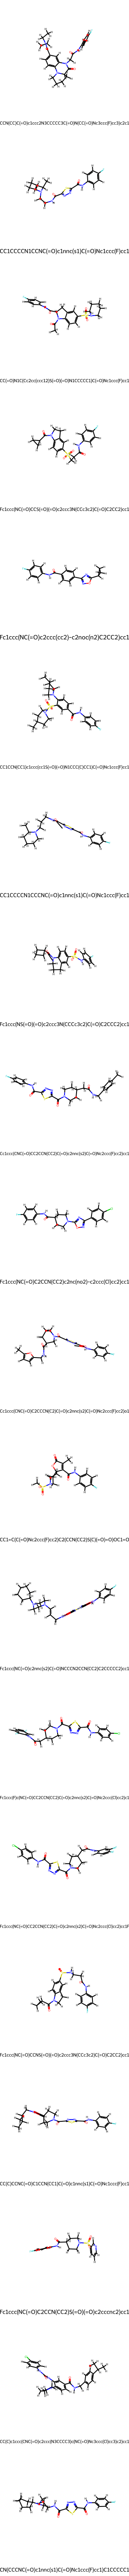

In [35]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Select the first five SMILES and convert to a list
smiles_list = df_predictions_adjusted['Smiles'].head(20).tolist()

# Convert SMILES to RDKit Mol objects and generate 3D structures
molecules = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Add hydrogens
        mol = Chem.AddHs(mol)
        # Generate 3D coordinates
        AllChem.EmbedMolecule(mol, randomSeed=0xf00d)
        AllChem.UFFOptimizeMolecule(mol)
        molecules.append(mol)

# Draw the molecules with SMILES as labels in separate rows
img = Draw.MolsToGridImage(molecules, molsPerRow=1, subImgSize=(300, 300), legends=smiles_list)

# Display the image
img


In [36]:
# Print out the first 20 SMILES
print("First 20 SMILES:")
for smiles in smiles_list:
    print(smiles)

First 20 SMILES:
CCN(CC)C(=O)c1ccc2N3CCCCC3C(=O)N(CC(=O)Nc3ccc(F)cc3)c2c1
CC1CCCCN1CCNC(=O)c1nnc(s1)C(=O)Nc1ccc(F)cc1
CC(=O)N1C(Cc2cc(ccc12)S(=O)(=O)N1CCCCC1)C(=O)Nc1ccc(F)cc1
Fc1ccc(NC(=O)CCS(=O)(=O)c2ccc3N(CCc3c2)C(=O)C2CC2)cc1
Fc1ccc(NC(=O)c2ccc(cc2)-c2noc(n2)C2CC2)cc1
CC1CCN(CC1)c1ccc(cc1S(=O)(=O)N1CCC(C)CC1)C(=O)Nc1ccc(F)cc1
CC1CCCCN1CCCNC(=O)c1nnc(s1)C(=O)Nc1ccc(F)cc1
Fc1ccc(NS(=O)(=O)c2ccc3N(CCCc3c2)C(=O)C2CCC2)cc1
Cc1ccc(CNC(=O)CC2CCN(CC2)C(=O)c2nnc(s2)C(=O)Nc2ccc(F)cc2)cc1
Fc1ccc(NC(=O)C2CCN(CC2)c2nc(no2)-c2ccc(Cl)cc2)cc1
Cc1ccc(CNC(=O)C2CCCN(C2)C(=O)c2nnc(s2)C(=O)Nc2ccc(F)cc2)o1
CC1=C(C(=O)Nc2ccc(F)cc2)C2(CCN(CC2)S(C)(=O)=O)OC1=O
Fc1ccc(NC(=O)c2nnc(s2)C(=O)NCCCN2CCN(CC2)C2CCCCC2)cc1
Fc1ccc(F)c(NC(=O)CC2CCN(CC2)C(=O)c2nnc(s2)C(=O)Nc2ccc(Cl)cc2)c1
Fc1ccc(NC(=O)CC2CCN(CC2)C(=O)c2nnc(s2)C(=O)Nc2ccc(Cl)cc2)cc1F
Fc1ccc(NC(=O)CCNS(=O)(=O)c2ccc3N(CCc3c2)C(=O)C2CC2)cc1
CC(C)CCNC(=O)C1CCN(CC1)C(=O)c1nnc(s1)C(=O)Nc1ccc(F)cc1
Fc1ccc(NC(=O)C2CCN(CC2)S(=O)(=O)c2cccnc2)cc1
CC(C)c1ccc(CNC(=O